<a href="https://colab.research.google.com/github/Shindora/Learn-Deep/blob/master/Practice1_Planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [3]:
path=untar_data(URLs.PLANET_SAMPLE)
path

PosixPath('/root/.fastai/data/planet_sample')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/train'),
 PosixPath('/root/.fastai/data/planet_sample/labels.csv')]

In [5]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224
                                  )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


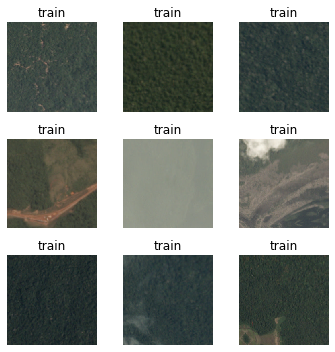

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
pd.read_csv(path/'labels.csv').head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [0]:
data = ImageDataBunch.from_csv(path, folder='train', size=128, suffix='.jpg', label_delim=' ',
    ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

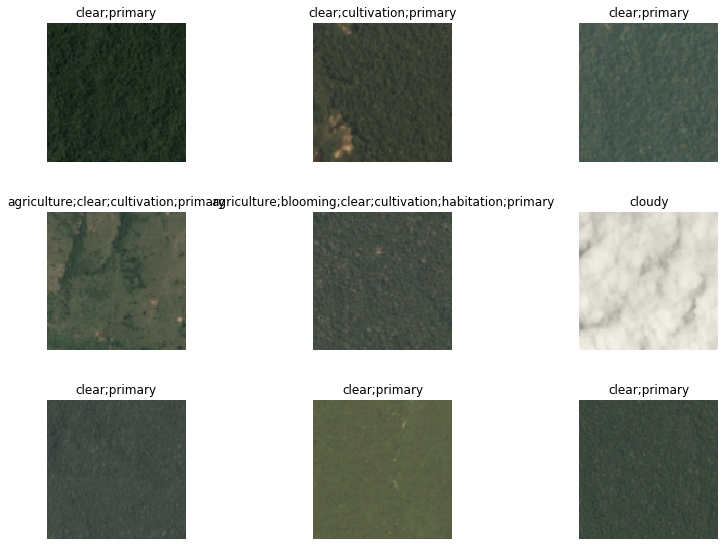

In [9]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

In [10]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;cultivation;primary;water,haze;primary,clear;primary,haze;primary;road,clear;primary
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (200 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,clear;cultivation;primary,clear;primary,agriculture;clear;cultivation;primary,agriculture;blooming;clear;cultivation;habitation;primary
Path: /root/.fastai/data/planet_sample;

Test: None

In [11]:
print(data.classes)
print(len(data.classes));data.c

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']
17


17

In [12]:
learn=create_cnn(data,models.resnet50,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [13]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.993598,0.775876,0.769118,00:05
1,0.922270,0.671943,0.862059,00:04
2,0.852221,0.665179,0.861765,00:04
3,0.780835,0.516206,0.886176,00:04
4,0.689710,0.353406,0.879412,00:04
5,0.586270,0.230542,0.859706,00:04
6,0.489181,0.183474,0.879118,00:04
7,0.410558,0.158268,0.883529,00:04
8,0.347999,0.152053,0.897647,00:04
9,0.299315,0.152377,0.909412,00:04


In [0]:
learn.save('/content/drive/My Drive/fastai/stage-1.5')

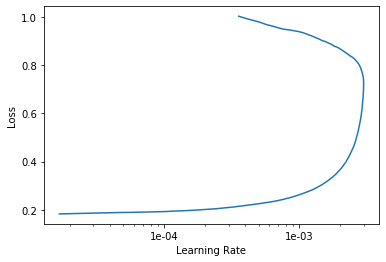

In [15]:
learn.recorder.plot()

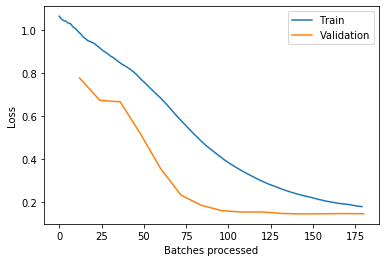

In [16]:
learn.recorder.plot_losses()

In [17]:

interp = ClassificationInterpretation.from_learner(learn)

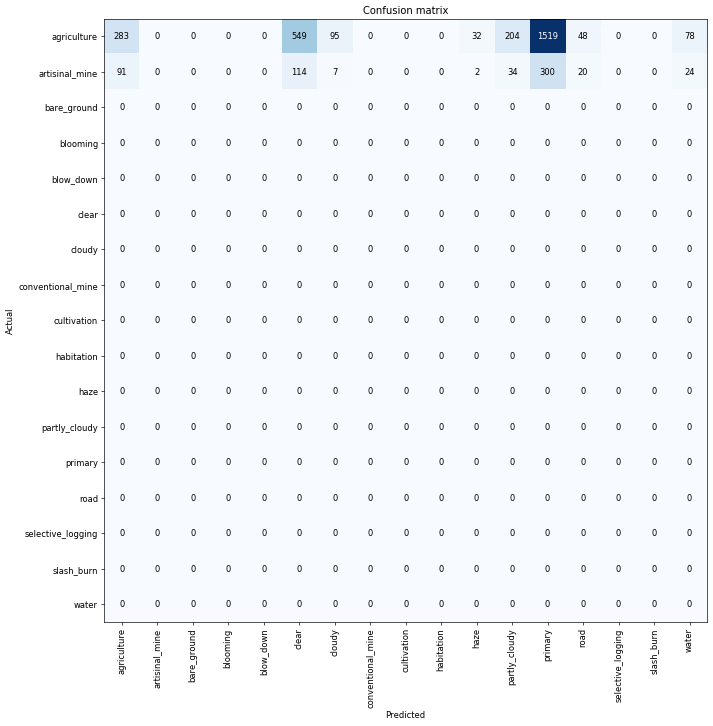

In [19]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)